In [5]:
import shutil
shutil.copy2('/content/drive/My Drive/Dataset/Dataset.zip','.')

'./Dataset.zip'

In [6]:
from zipfile import ZipFile
fname='Dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
import os
os.mkdir('dataset')

In [8]:
#covid=0    normal=1     pneumonia=2
shutil.move('covid','dataset')
shutil.move('normal','dataset')


os.chdir('dataset')
os.rename('covid','0')
os.rename('normal','1')

os.chdir('../')

In [9]:
import random
os.chdir('dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('test')
  os.mkdir('valid')

  for i in range(0,3):
    shutil.move(f'{i}','train')
    os.mkdir(f'test/{i}')
    os.mkdir(f'valid/{i}')

    num=70
    if(i==0):
      num=30

    test_samples=random.sample(os.listdir(f'train/{i}'),num)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}',f'test/{i}')

    valid_samples=random.sample(os.listdir(f'train/{i}'),num)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}') 

os.chdir("../")  

FileNotFoundError: ignored

In [10]:
# os.chdir('../')
# import shutil
# shutil.rmtree('dataset')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [2]:
train_datagen=image.ImageDataGenerator(
     rescale=1./255,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.1,
    shear_range=.1,
    horizontal_flip=True
                                       )

test_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )
valid_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )

In [3]:
train_path='dataset/train'
test_path='dataset/test'
valid_path='dataset/valid'

In [4]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(448,448),
    batch_size=32,
    classes=['0','1']
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(448,448),
    batch_size=32,
    classes=['0','1']
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(448,448),
    batch_size=32,
    classes=['0','1']
)

Found 1227 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
!ls

dataset  Dataset.zip  drive  pneumonia	sample_data


In [17]:
os.chdir("../")

In [11]:
model=Sequential()

model.add(Conv2D(32,padding='same',kernel_size=(3,3),activation='relu',input_shape=(448,448,3)))
model.add(Conv2D(32,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

ResourceExhaustedError: ignored

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 448, 448, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 448, 448, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 224, 224, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 128)    

In [10]:
model.fit(train_gen,validation_data=valid_gen,epochs=15,batch_size=64,verbose=2,shuffle=True)

Epoch 1/15


ResourceExhaustedError: ignored

In [2]:
# import shutil
# shutil.rmtree('dataset')

In [28]:
predictions=model.predict(test_gen)

In [29]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[10 20]
 [17 53]]


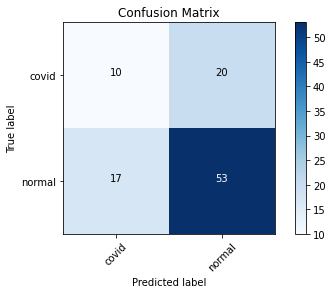

In [32]:
cm_plot_labels=['covid','normal']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [33]:
accuracy_score(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

0.63